# Banking Customer Churn Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

## 2. Data Collection and Exploration

In [2]:
# load data
df = pd.read_csv(r"D:\AI\data\datasets-1\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.describe()

RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9985.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     5.013721   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.892213   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count      9990.000000  10000.000000  
mean     100127.441333      0.203700  
std       57497.228065      0.402769  
min          11.580000      0.000000  
25%       51112.885000      0.000000  
50%      100238.110000      0.000000  
75%      149400.922500      0.000000  
max      199992.480000      1.000000

Analysis:
    
        - RowNumber, customerid and surname are unwanted columns
        - Label/target: Exited
        - demographic: Age, Gender, Geography
        - Financial capability: CreditScore, EstimatedSalary, Balance
        - Relation with Bank: Tenure, NumofProducts, IsActiveMember, HasCrCard
        - Age may have some outliers

## 3. Data Cleaning

### Handling missing data
    - data is missing because it does not exist
        - Numeric: convert the column into binary or categorical, add one category as "unavailable"/"others"
        - Categoric: replace all missing values by an additional/existing category "others"/"not known"
        
        
    - data exists, but it is missing because of some human or system error
        - if any row has more than 60% of values missing - drop the row
        - if any column has more than 70%-80% values missing - drop the column
        - for rows having upto 5%-10% (depending on size of data) missing data - statistical imputation
            - Categoric: Nominal: Mode
            - Categoric: Ordinal: Median
            - Numeric: skewness > 0.1 or skewness < -0.1 => median
            - NumericL: skewness is b/w -0.1 to +0.1 => Mean
          - for rows having more than 10% of data missing: ML based imputation
          

In [5]:
# check for missing values
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             15
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    10
Exited              0
dtype: int64

In [6]:
df[['Tenure','EstimatedSalary']].skew()

Tenure             0.010333
EstimatedSalary    0.001322
dtype: float64

In [7]:
df.Tenure.fillna(df.Tenure.mean(),inplace=True)
df.EstimatedSalary.fillna(df.EstimatedSalary.mean(),inplace=True)

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# check for duplicates
df.duplicated().sum()

0

In [10]:
# duplicate check based on specific column
df['CustomerId'].duplicated().sum()

0

In [11]:
print(df.shape)
# drop unwanted column
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)
print(df.shape)

(10000, 14)
(10000, 11)


In [12]:
# check for outliers
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_18068/3256115495.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


CreditScore       -0.071607
Age                1.011320
Tenure             0.010341
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001323
Exited             1.471611
dtype: float64

## 4. Feature Selection

### Data Visualization

#### Univariate Analysis

In [13]:
for col in df.columns:
    fig = px.histogram(df,x=col,width=850,height=400)
    fig.show()

#### Bivariate Analysis

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
sns.set_theme()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



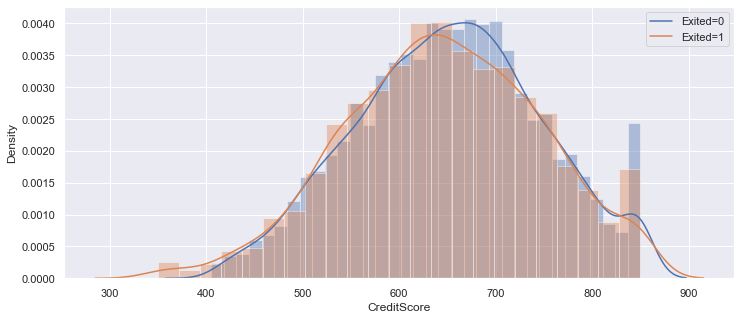

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



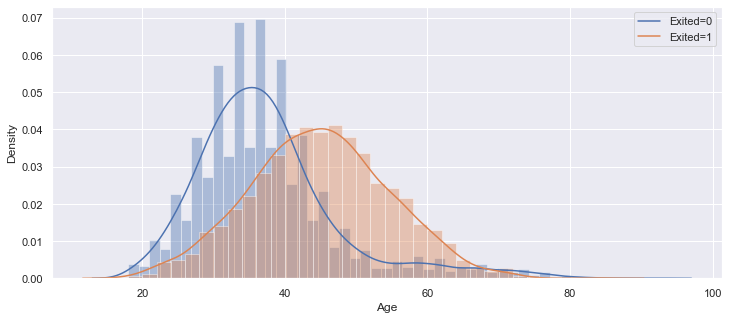

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



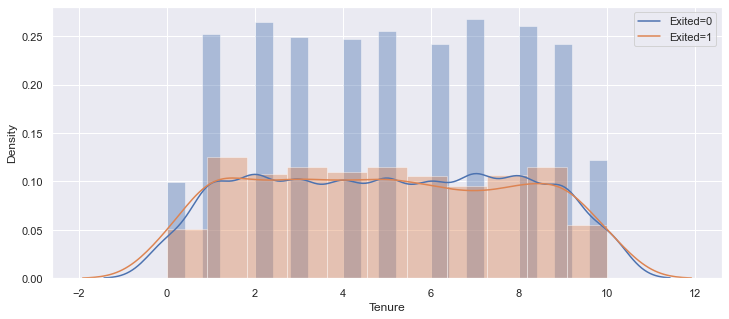

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



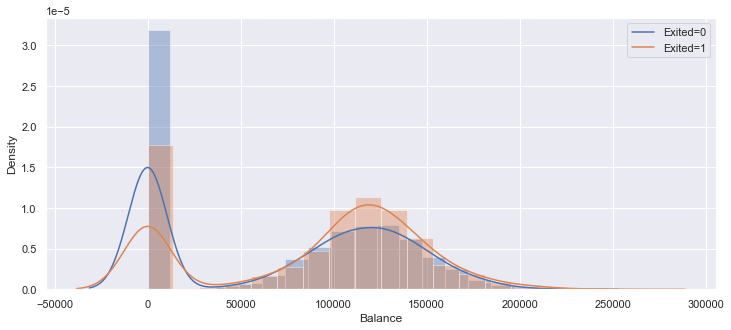

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



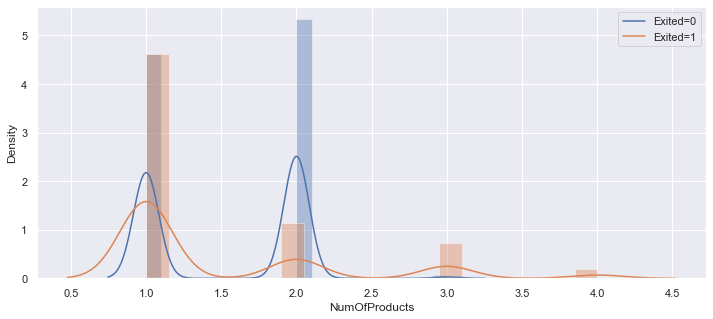

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



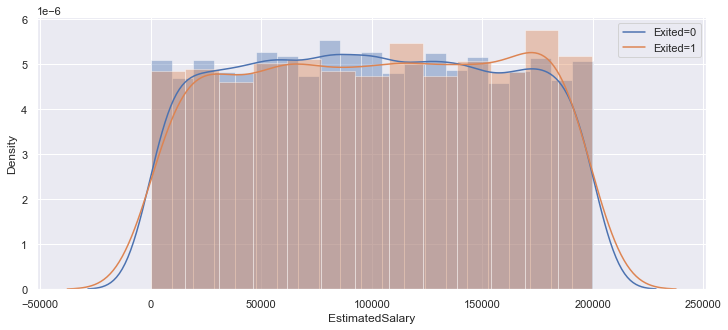

In [16]:
# numeric v/s categoric
nums = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts',  'EstimatedSalary']


for col in nums:
    plt.figure(figsize=(12,5))
    sns.distplot(df[col][df.Exited==0])
    sns.distplot(df[col][df.Exited==1])
    plt.legend(['Exited=0','Exited=1'])
    plt.show()
    

In [17]:
# Geography v/ Exited
pivot = pd.crosstab(df.Geography,df.Exited,margins=True)
pivot

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000

In [18]:
# analyzing ratio of leaving customers
pivot[1]/pivot['All']

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

In [19]:
# Gender v/s Exited
pivot = pd.crosstab(df.Gender,df.Exited,margins=True)
pivot[1]/pivot['All']

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

In [20]:
# HasCrCard v/s Exited
pivot = pd.crosstab(df.HasCrCard,df.Exited,margins=True)
pivot[1]/pivot['All']

HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64

In [21]:
# IsActiveMember v/s Exited
pivot = pd.crosstab(df.IsActiveMember,df.Exited,margins=True)
pivot[1]/pivot['All']

IsActiveMember
0      0.268509
1      0.142691
All    0.203700
dtype: float64

#### Multivariate Analysis

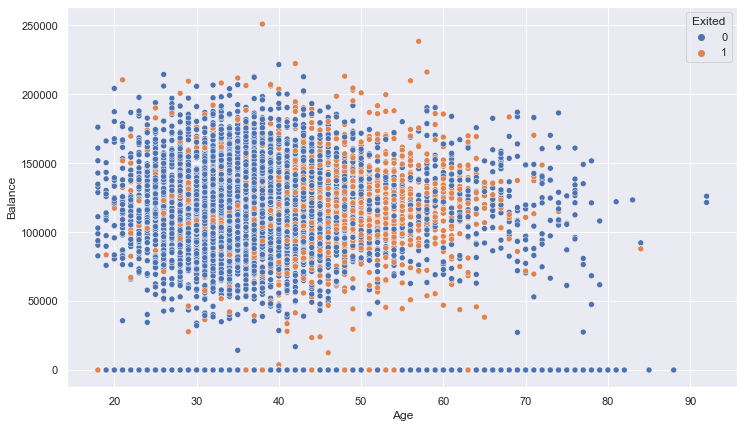

In [22]:
# age v/s Balance v/s exited
plt.figure(figsize=(12,7))
sns.scatterplot(x='Age',y='Balance',hue='Exited',data=df)
plt.show()

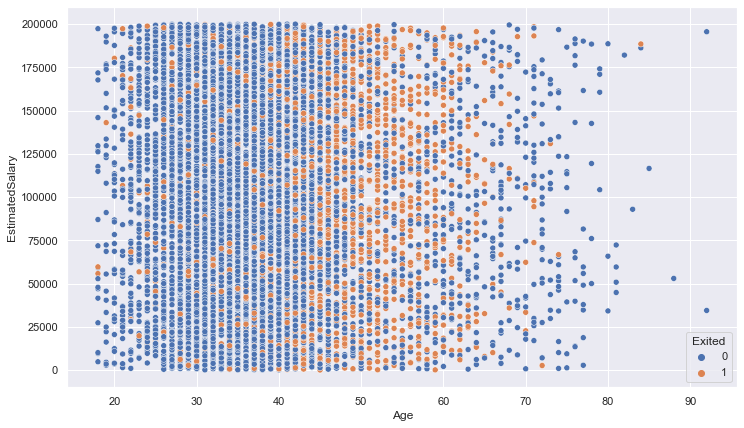

In [23]:
# age v/s Balance v/s exited
plt.figure(figsize=(12,7))
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Exited',data=df)
plt.show()

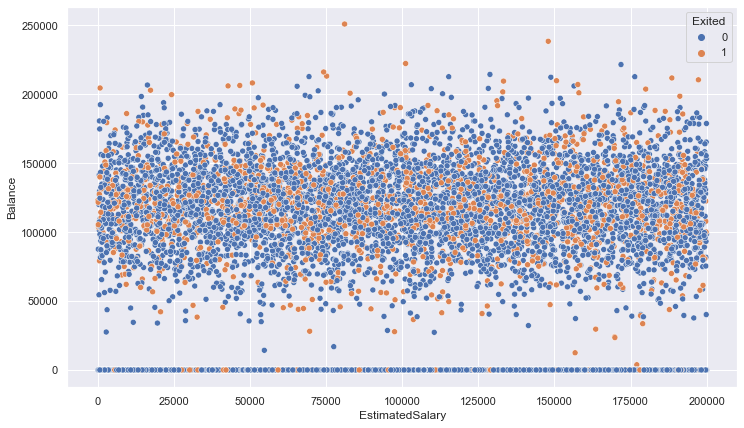

In [24]:
# age v/s Balance v/s exited
plt.figure(figsize=(12,7))
sns.scatterplot(x='EstimatedSalary',y='Balance',hue='Exited',data=df)
plt.show()

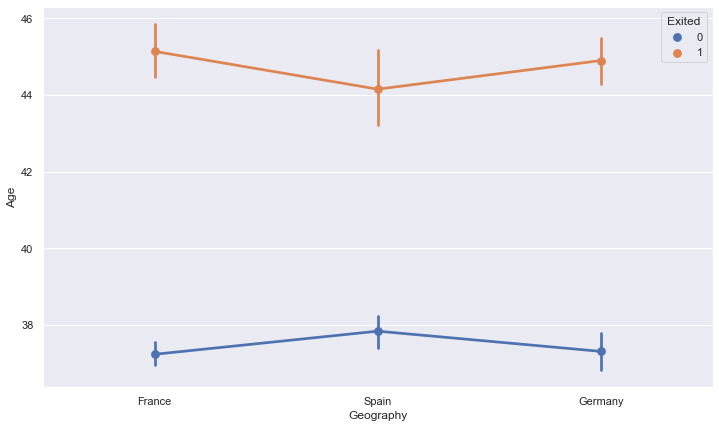

In [25]:
# age v/s Geography v/s exited
plt.figure(figsize=(12,7))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

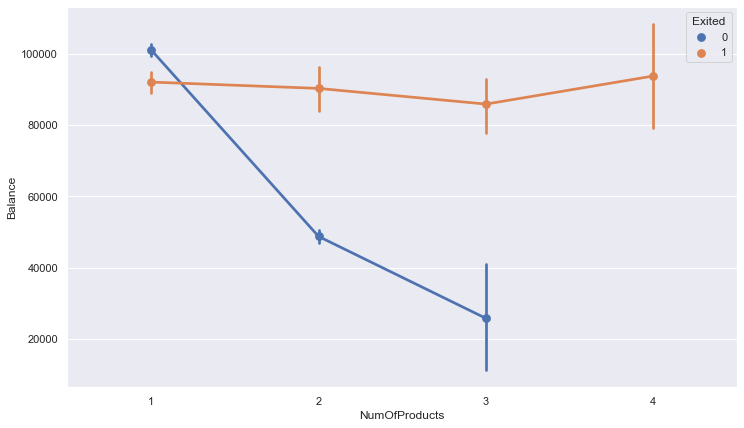

In [26]:
# age v/s Geography v/s exited
plt.figure(figsize=(12,7))
sns.pointplot(x='NumOfProducts',y='Balance',hue='Exited',data=df)
plt.show()

### Statistical Research

#### Correlation Analysis

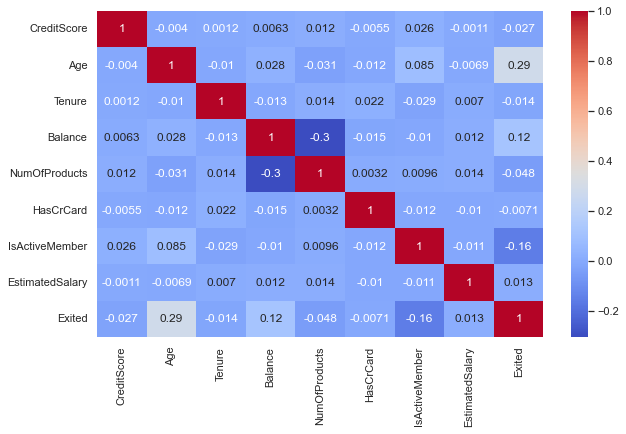

In [27]:
cor = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

Correlation helps in following way - 

    - it helps in identifying features which are having linear relation with the target attribute
    - In machine learning, supervised ML, there are two types of algorithms
    
        - linear models
            - these are the techniques which primarily learn linear relationship between features and target
            - these mostly lightweight, faster, can give good results with less data
            - can be used if correlation analysis says, most features have good correlation with target attribute
            - linear regression, logistic regression, linear SVM, naive bayes
            
            
        - non linear models
            - these can additionally learn non linear complex relationship between features and target
            - these are heavy, slow, computaionally expensive, need more data to train
            - can be used if features do not have much stronger correlation with target, that means they have mostly some non linear relation with target
            - decision tree, ensemble techniques (random forest, xboost etc.), neural networks

In [28]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [29]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts', 'IsActiveMember']]
y = df.Exited

## 5. Preprocessing

In [30]:
x.head(8)

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0          619    France  Female   42       0.00              1   
1          608     Spain  Female   41   83807.86              1   
2          502    France  Female   42  159660.80              3   
3          699    France  Female   39       0.00              2   
4          850     Spain  Female   43  125510.82              1   
5          645     Spain    Male   44  113755.78              2   
6          822    France    Male   50       0.00              2   
7          376   Germany  Female   29  115046.74              4   

   IsActiveMember  
0               1  
1               1  
2               0  
3               0  
4               1  
5               0  
6               1  
7               0

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

prep = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2]),],remainder='passthrough')

prep.fit(x)

x2 = pd.DataFrame(prep.transform(x))

In [32]:
x2.head(8)

0    1    2      3     4          5    6    7
0  0.0  0.0  0.0  619.0  42.0       0.00  1.0  1.0
1  0.0  1.0  0.0  608.0  41.0   83807.86  1.0  1.0
2  0.0  0.0  0.0  502.0  42.0  159660.80  3.0  0.0
3  0.0  0.0  0.0  699.0  39.0       0.00  2.0  0.0
4  0.0  1.0  0.0  850.0  43.0  125510.82  1.0  1.0
5  0.0  1.0  1.0  645.0  44.0  113755.78  2.0  0.0
6  0.0  0.0  1.0  822.0  50.0       0.00  2.0  1.0
7  1.0  0.0  0.0  376.0  29.0  115046.74  4.0  0.0

In [33]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2,random_state=3,stratify=y)
print(x.shape,xtrain.shape,xtest.shape)
print(y.shape,ytrain.shape,ytest.shape)

(10000, 7) (8000, 8) (2000, 8)
(10000,) (8000,) (2000,)


In [34]:
y.sum()/y.size

0.2037

In [35]:
ytrain.sum()/ytrain.size

0.20375

In [36]:
ytest.sum()/ytest.size

0.2035

## 6. Apply machine Learning: logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# train the model with train data
model.fit(xtrain,ytrain)

LogisticRegression()

## 7. Performance Analysis

In [38]:
# age = 25, balance = 120000, nop = 2, gender = male, geo = france, iam = 1, cs=650
newcust =[[650,'France','Male',25,120000,2,1]]
newcust = prep.transform(newcust)
print(newcust)
model.predict(newcust)

[[0.0 0.0 1.0 650 25 120000 2 1]]


array([0], dtype=int64)

In [39]:
newcust =[[650,'France','Male',25,120000,2,1],[650,'Germany','Female',55,180000,2,0]]
newcust = prep.transform(newcust)
print(newcust)
model.predict(newcust)

[[0.0 0.0 1.0 650 25 120000 2 1]
 [1.0 0.0 0.0 650 55 180000 2 0]]


array([0, 0], dtype=int64)

#### Accuracy

In [40]:
from sklearn import metrics

# get predictions for xtest
ypred = model.predict(xtest)

# calcualate accuracy
metrics.accuracy_score(ytest,ypred)

0.7865

In [41]:
# recall
metrics.recall_score(ytest,ypred)

0.044226044226044224

In [42]:
# precision
metrics.precision_score(ytest,ypred)

0.32142857142857145

In [43]:
# f1 score
metrics.f1_score(ytest,ypred)

0.07775377969762419

In [44]:
# confusion matrix
metrics.confusion_matrix(ytest,ypred)

array([[1555,   38],
       [ 389,   18]], dtype=int64)

In [45]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1593
           1       0.32      0.04      0.08       407

    accuracy                           0.79      2000
   macro avg       0.56      0.51      0.48      2000
weighted avg       0.70      0.79      0.72      2000



In [46]:
(0.88+0.08)/2

0.48

In [47]:
(0.88*1593 + 0.08*407)/2000

0.7172

## 5. Preprocessing

In [48]:
x.head(2)

CreditScore Geography  Gender  Age   Balance  NumOfProducts  IsActiveMember
0          619    France  Female   42      0.00              1               1
1          608     Spain  Female   41  83807.86              1               1

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

prep = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2]),
                         ('sc',StandardScaler(),[0,3,4,5])],remainder='passthrough')

prep.fit(x)

x2 = pd.DataFrame(prep.transform(x))

In [50]:
x2.head(2)

0    1    2         3         4         5         6    7
0  0.0  0.0  0.0 -0.326221  0.293517 -1.225848 -0.911583  1.0
1  0.0  1.0  0.0 -0.440036  0.198164  0.117350 -0.911583  1.0

In [51]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2,random_state=3,stratify=y)
print(x.shape,xtrain.shape,xtest.shape)
print(y.shape,ytrain.shape,ytest.shape)

(10000, 7) (8000, 8) (2000, 8)
(10000,) (8000,) (2000,)


## 6. Apply machine Learning: logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# train the model with train data
model.fit(xtrain,ytrain)

LogisticRegression()

## 7. Performance Analysis

In [53]:
# age = 25, balance = 120000, nop = 2, gender = male, geo = france, iam = 1, cs=650
newcust =[[650,'France','Male',25,120000,2,1]]
newcust = prep.transform(newcust)
print(newcust)
model.predict(newcust)

[[0.0 0.0 1.0 -0.005471374995973408 -1.3274936190253817
  0.6974053879257006 0.8077365626180215 1]]


array([0], dtype=int64)

#### Accuracy

In [54]:
from sklearn import metrics

# get predictions for xtest
ypred = model.predict(xtest)

# calcualate accuracy
metrics.accuracy_score(ytest,ypred)

0.8115

In [55]:
# recall
metrics.recall_score(ytest,ypred)

0.21375921375921375

In [56]:
# precision
metrics.precision_score(ytest,ypred)

0.6041666666666666

In [57]:
# f1 score
metrics.f1_score(ytest,ypred)

0.31578947368421045

In [58]:
# confusion matrix
metrics.confusion_matrix(ytest,ypred)

array([[1536,   57],
       [ 320,   87]], dtype=int64)

In [59]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.60      0.21      0.32       407

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



# KNN Implementation

In [61]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=3)

In [62]:
# train the model using train data
model2.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# analyse performnace on test data

ypred2 = model2.predict(xtest)

print(metrics.classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.65      0.53      0.58       407

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [66]:
- (0.95*np.log10(0.95) + 0.05*np.log10(0.05))

0.0862140747587937

In [67]:
 - (0.50*np.log10(0.50) + 0.50*np.log10(0.50))

0.3010299956639812

## Decision Tree Implementation

In [68]:
from sklearn import tree

In [69]:
model3 = tree.DecisionTreeClassifier(criterion='gini',random_state=3)
# train the model
model3.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=3)

In [70]:
# analyse performnace on test data
ypred3 = model3.predict(xtest)
print(metrics.classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1593
           1       0.49      0.55      0.52       407

    accuracy                           0.79      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.80      0.79      0.80      2000



In [71]:
# analyse performnace on train data
ypred3 = model3.predict(xtrain)
print(metrics.classification_report(ytrain,ypred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



## Overfitting

    - performance of model on test data = low
    - performance of model on train data = high
    
#### Why overfitting happens
    - presence of noisy observations, noisy features
    - lack of samples - because of small data size
    - learning algorithm is highly complex
    
#### How to control overfitting
    - collect more rows, no need to collect more columns
    - drop some less relevant columns
    - try slighly less complex learning algorithm
    - in case of decision tree decrease values of max parameters (max_depth), increase values of min parameters (min_samples_leaf, min_samples_split)
    
    

## Underfitting

    - performance of model on test data = low
    - performance of model on train data = low
    
#### why underfitting happens
    - presence of noisy observation
    - lack of informative features
    - learning almorithm is less powerful
    
#### How to control underfitting
    - collect more columns, no need to collect more rows
    - create extra columns by feature extraction
    - use more complex learning algorithm
    - in case of decision tree, increase values of max parameter (max_depth) and decrease values of min parameters (min_samples_leaf, min_samples_split)

## Control Overfitting

In [72]:
model4 = tree.DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=8,
                                    min_samples_leaf=10,min_samples_split=30)
# train the model
model4.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=30,
                       random_state=3)

In [73]:
# analyse performnace on test data
ypred4 = model4.predict(xtest)
print(metrics.classification_report(ytest,ypred4))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1593
           1       0.70      0.57      0.62       407

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.85      0.86      0.86      2000



In [74]:
# analyse performnace on train data
ypred4 = model4.predict(xtrain)
print(metrics.classification_report(ytrain,ypred4))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6370
           1       0.73      0.58      0.64      1630

    accuracy                           0.87      8000
   macro avg       0.81      0.76      0.78      8000
weighted avg       0.86      0.87      0.86      8000



## Hyperparameter tuning using GridSearch

In [84]:
params = {'max_depth':np.arange(5,15,1),
          "min_samples_leaf":np.arange(start=5,stop=50,step=5),
         "min_samples_split":np.arange(10,80,10)}
params

{'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
 'min_samples_split': array([10, 20, 30, 40, 50, 60, 70])}

In [85]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(tree.DecisionTreeClassifier(random_state=3),param_grid=params,
                     scoring='f1',n_jobs=-1,verbose=True,cv=5)
search.fit(x2,y)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                         'min_samples_split': array([10, 20, 30, 40, 50, 60, 70])},
             scoring='f1', verbose=True)

In [86]:
search.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 70}

In [87]:
search.best_score_

0.5861358124075455

### Visualizing the decision tree model

In [96]:
x.head(2)

CreditScore Geography  Gender  Age   Balance  NumOfProducts  IsActiveMember
0          619    France  Female   42      0.00              1               1
1          608     Spain  Female   41  83807.86              1               1

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

prep = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2]),],remainder='passthrough')

prep.fit(x)

x2 = pd.DataFrame(prep.transform(x))

# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2,random_state=3,stratify=y)

In [93]:
model4 = tree.DecisionTreeClassifier(criterion='entropy',random_state=3,max_depth=8,
                                    min_samples_leaf=10,min_samples_split=30,max_leaf_nodes=30)
# train the model
model4.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=30,
                       min_samples_leaf=10, min_samples_split=30,
                       random_state=3)

In [94]:
prep.get_feature_names()

['ohe__x0_Germany',
 'ohe__x0_Spain',
 'ohe__x1_Male',
 'CreditScore',
 'Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember']

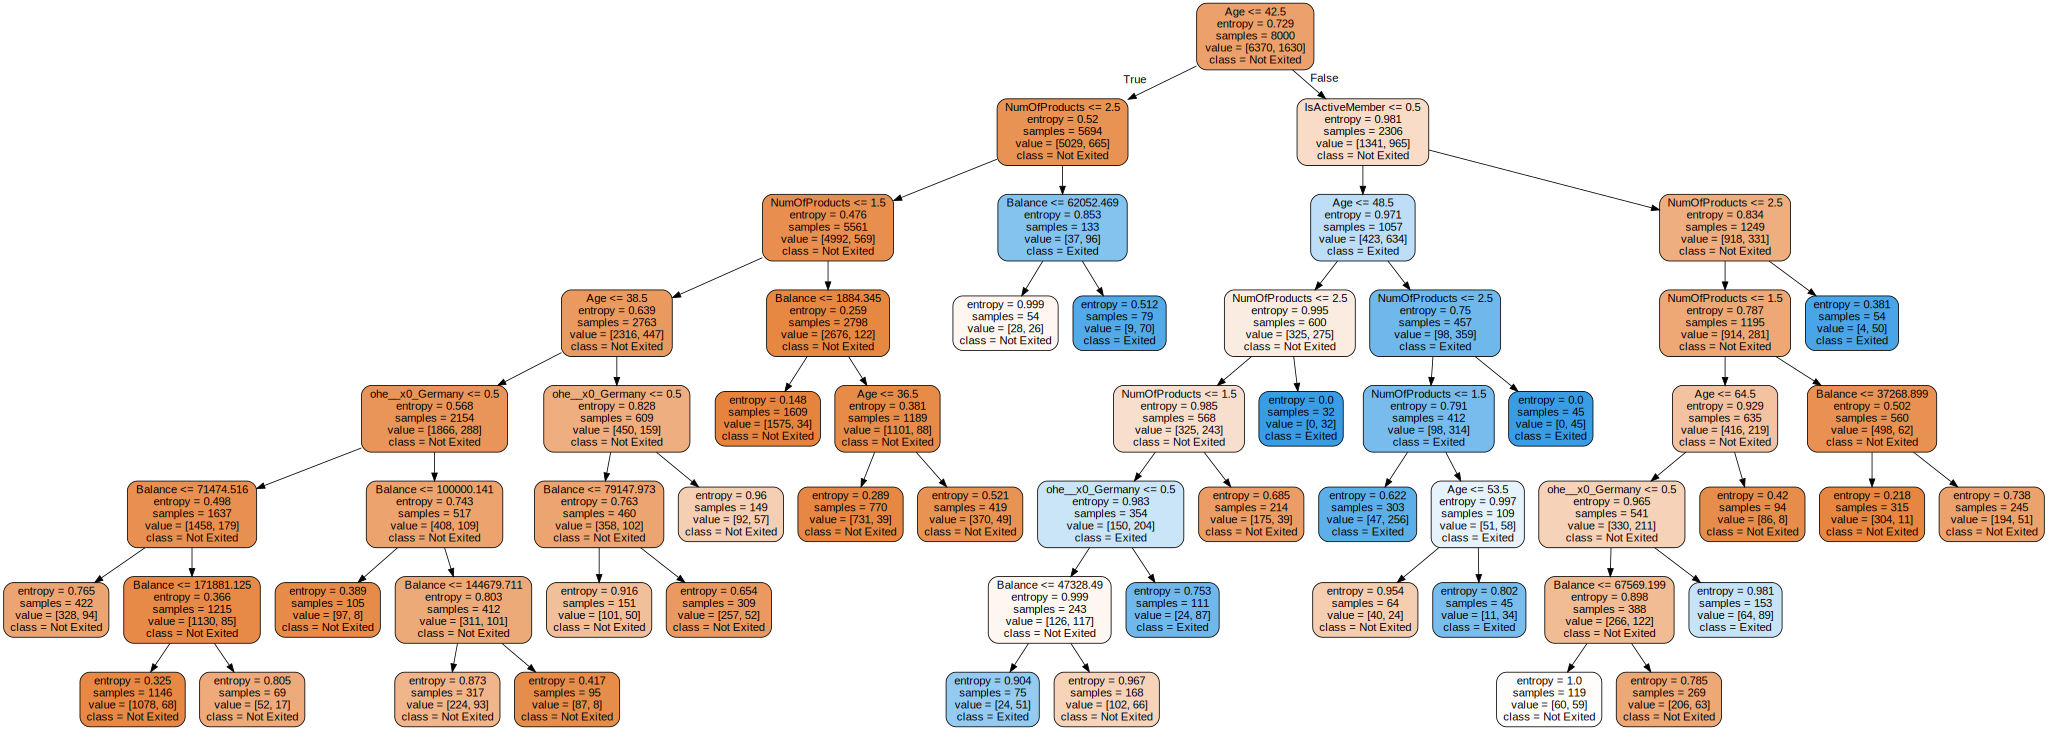

In [95]:
# pip install graphviz
import graphviz
graph_data = tree.export_graphviz(model4,class_names=['Not Exited','Exited'],
                                 feature_names=prep.get_feature_names(),rounded=True,filled=True)
graph = graphviz.Source(graph_data)
graph

In [103]:
graph.format = 'png'
graph.render('mygraph',view=True)

'mygraph.png'

## Random Forest Implementation

In [105]:
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier(n_estimators=200,oob_score=True,random_state=3,
                               max_depth=6,min_samples_leaf=10)

In [106]:
# train the model
model5.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_estimators=200,
                       oob_score=True, random_state=3)

In [107]:
# analyse performnace on test data
ypred5 = model5.predict(xtest)
print(metrics.classification_report(ytest,ypred5))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.85      0.37      0.51       407

    accuracy                           0.86      2000
   macro avg       0.85      0.68      0.72      2000
weighted avg       0.86      0.86      0.83      2000



In [108]:
# analyse performnace on train data
ypred5 = model5.predict(xtrain)
print(metrics.classification_report(ytrain,ypred5))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6370
           1       0.85      0.39      0.54      1630

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [109]:
model5.oob_score_

0.85575

In [110]:
model5.feature_importances_

array([0.05759819, 0.00549979, 0.02000838, 0.02962784, 0.42155795,
       0.06549438, 0.30415438, 0.09605909])

In [111]:
for i in range(len(model5.feature_importances_)):print(prep.get_feature_names()[i],model5.feature_importances_[i])

ohe__x0_Germany 0.05759818739502542
ohe__x0_Spain 0.005499788458336821
ohe__x1_Male 0.020008380983022562
CreditScore 0.029627837241831968
Age 0.42155795124926604
Balance 0.06549438113454559
NumOfProducts 0.3041543794226081
IsActiveMember 0.09605909411536334


## Adaboost Implementation

In [112]:
from sklearn.ensemble import AdaBoostClassifier

model6 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1,random_state=3),
                           n_estimators=500)

model6.fit(xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=3),
                   n_estimators=500)

In [113]:
# analyse performnace on test data
ypred = model6.predict(xtest)
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.49      0.59       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [114]:
# analyse performnace on train data
ypred = model6.predict(xtrain)
print(metrics.classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6370
           1       0.75      0.48      0.59      1630

    accuracy                           0.86      8000
   macro avg       0.81      0.72      0.75      8000
weighted avg       0.85      0.86      0.85      8000



## Gradient Boosting Tree

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

model7 = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000,max_depth=2)

model7.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=1000)

In [120]:
# analyse performnace on test data
ypred = model7.predict(xtest)
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [121]:
# analyse performnace on train data
ypred = model7.predict(xtrain)
print(metrics.classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6370
           1       0.80      0.46      0.58      1630

    accuracy                           0.87      8000
   macro avg       0.84      0.71      0.75      8000
weighted avg       0.86      0.87      0.85      8000



## XGboost

In [122]:
# pip install xgboost

In [128]:
from xgboost import XGBClassifier
model8 = XGBClassifier(n_estimators=500,n_jobs=-1)

In [129]:
model8.fit(xtrain,ytrain)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
# analyse performnace on test data
ypred = model8.predict(xtest)
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1593
           1       0.63      0.49      0.55       407

    accuracy                           0.84      2000
   macro avg       0.75      0.71      0.72      2000
weighted avg       0.83      0.84      0.83      2000



## Stacking Implementation

In [ ]:
# pip install mlxtend

In [134]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [135]:
base1 = KNeighborsClassifier(n_neighbors=3)
base2 = DecisionTreeClassifier(random_state=5)
base3 = RandomForestClassifier(n_estimators=250,random_state=5)
base4 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=500)

meta = LogisticRegression()



model9 = StackingClassifier(classifiers=[base1,base2,base3,base4],meta_classifier=meta)
model9.fit(xtrain,ytrain)

StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=3),
                                DecisionTreeClassifier(random_state=5),
                                RandomForestClassifier(n_estimators=250,
                                                       random_state=5),
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                                   n_estimators=500)],
                   meta_classifier=LogisticRegression())

In [136]:
# analyse performnace on test data
ypred = model9.predict(xtest)
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1593
           1       0.73      0.52      0.61       407

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

